In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

In [0]:
x_data = np.linspace(0, 10, 1000000)
noise = np.random.randn(len(x_data))

In [3]:
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

y = mx + b 

m = 0.5

b = 5


In [0]:
y_true = (0.5 * x_data) + 5 + noise

In [0]:
x_df = pd.DataFrame(data = x_data, columns = ["X Data"])
y_df = pd.DataFrame(data = y_true, columns = ["Y"])

In [6]:
y_df.head()

,Y
0,6.034890
1,6.541188
2,2.609136
3,4.426973
4,5.379634


In [0]:
my_data = pd.concat([x_df, y_df], axis = 1)

In [8]:
my_data.head()

,X Data,Y
0,0.00000,6.034890
1,0.00001,6.541188
2,0.00002,2.609136
3,0.00003,4.426973
4,0.00004,5.379634


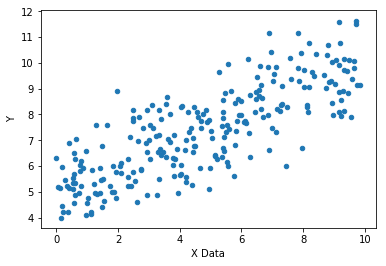

In [9]:
my_data.sample(n = 250).plot(kind = "scatter", x = 'X Data', y = 'Y')

In [0]:
batch_size = 16

In [0]:
m = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())

In [0]:
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

In [0]:
y_model = m * xph + b

In [0]:
error = tf.reduce_sum(tf.square(yph - y_model))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(error)

In [0]:
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
  sess.run(init)
  
  batches = 7000
  
  for i in range(batches):
    
    rand_ind = np.random.randint(len(x_data), size = batch_size)
    
    feed = {xph: x_data[rand_ind], yph: y_true[rand_ind]}
    
    sess.run(train, feed_dict = feed)
  
  model_m, model_b = sess.run([m, b])

In [18]:
model_m

0.52817184

In [19]:
model_b

4.9724755

In [0]:
y_hat = x_data  * model_m + model_b

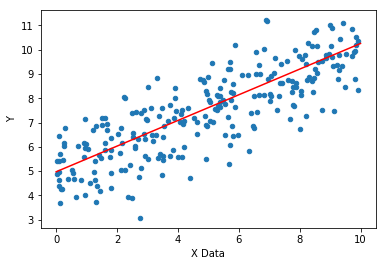

In [21]:
my_data.sample(250).plot(kind = 'scatter', x = 'X Data', y = 'Y')
plt.plot(x_data, y_hat, 'r')

# tf estimator

In [0]:
feat_cols = [ tf.feature_column.numeric_column('x', shape = [1]) ]

In [23]:
estimator = tf.estimator.LinearRegressor(feature_columns = feat_cols)

W0716 14:03:45.911116 139816264259456 estimator.py:1811] Using temporary folder as model directory: /tmp/tmp4ju5ofb1


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data,
                                                    y_true,
                                                    test_size = 0.3,
                                                    random_state = 101)

In [26]:
print(x_train.shape)

(700000,)


In [27]:
x_eval.shape

(300000,)

In [0]:
input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train},
                                                y_train,
                                                batch_size = 8,
                                                num_epochs = None,
                                                shuffle = True)

In [0]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train},
                                                       y_train,
                                                       batch_size = 8,
                                                       num_epochs = 1000,
                                                       shuffle = False)

In [0]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_eval},
                                                     y_eval,
                                                     batch_size = 8,
                                                     num_epochs = 1000,
                                                     shuffle = False)

In [31]:
estimator.train(input_fn= input_func, steps = 1000)

W0716 14:03:46.685674 139816264259456 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
W0716 14:03:46.708891 139816264259456 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_estimator/python/estimator/inputs/queues/feeding_queue_runner.py:62: QueueRunner.__init__ (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
W0716 14:03:46.711852 139816264259456 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_estimator/python/estimator/inputs/queues/feeding_functions.py:500: add_

In [32]:
train_metrics = estimator.evaluate(input_fn= train_input_func, steps= 1000)

W0716 14:03:49.412688 139816264259456 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


In [0]:
eval_metrics = estimator.evaluate(input_fn = eval_input_func, steps = 1000)

In [34]:
print('Training Data Metrics')
print(train_metrics)

Training Data Metrics
{'average_loss': 1.1042249, 'label/mean': 7.480457, 'loss': 8.833799, 'prediction/mean': 7.467482, 'global_step': 1000}


In [35]:
print('Eval Metrics')
print(eval_metrics)

Eval Metrics
{'average_loss': 1.1004143, 'label/mean': 7.4808993, 'loss': 8.803314, 'prediction/mean': 7.4453077, 'global_step': 1000}


In [0]:
brand_new_data = np.linspace(0, 10, 10)
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x': brand_new_data},
                                                      shuffle = False)

In [37]:
list(estimator.predict(input_fn= input_fn_predict))

[{'predictions': array([4.397296], dtype=float32)},
 {'predictions': array([5.079253], dtype=float32)},
 {'predictions': array([5.7612104], dtype=float32)},
 {'predictions': array([6.4431677], dtype=float32)},
 {'predictions': array([7.125125], dtype=float32)},
 {'predictions': array([7.807082], dtype=float32)},
 {'predictions': array([8.489038], dtype=float32)},
 {'predictions': array([9.170996], dtype=float32)},
 {'predictions': array([9.852954], dtype=float32)},
 {'predictions': array([10.53491], dtype=float32)}]

In [0]:
predictions = []
for pred in estimator.predict(input_fn= input_fn_predict):
  predictions.append(pred['predictions'])

In [39]:
predictions

[array([4.397296], dtype=float32),
 array([5.079253], dtype=float32),
 array([5.7612104], dtype=float32),
 array([6.4431677], dtype=float32),
 array([7.125125], dtype=float32),
 array([7.807082], dtype=float32),
 array([8.489038], dtype=float32),
 array([9.170996], dtype=float32),
 array([9.852954], dtype=float32),
 array([10.53491], dtype=float32)]

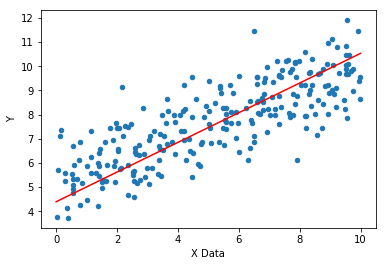

In [44]:
my_data.sample(n=250).plot(kind = 'scatter', x = 'X Data', y = 'Y')
plt.plot(brand_new_data, predictions, 'r')

In [0]:
# That's all folks